In [1]:
import numpy as np
import pandas as pd
from os import path
from random import choice, shuffle

from ga4stpg.graph import Graph, ReaderORLibrary
from ga4stpg.graph.steiner import (prunning_mst, shortest_path,
                            shortest_path_origin_prim,
                            prunning_kruskal_mst,
                            shortest_path_with_origin)

from ga4stpg.graph.util import (is_steiner_tree, 
                                has_cycle)


In [2]:
from ga4stpg.tree.pxcrossover import PXTree
from ga4stpg.tree.evaluation import EvaluateTreeGraph
from ga4stpg.tree.generate import GenerateBasedPrimRST

In [3]:
# input
input_file = 'steinc5.txt'

filename = path.join('..', '..', 'datasets','ORLibrary', input_file)
print(filename)

assert path.exists(filename)

reader = ReaderORLibrary()

stpg = reader.parser(filename)

..\..\datasets\ORLibrary\steinc5.txt


In [4]:
crossover = PXTree(stpg)
evaluator = EvaluateTreeGraph(stpg)
generator = GenerateBasedPrimRST(stpg)

In [5]:
%%time

data = list()
print(stpg.nro_nodes)

for _ in range(200):
    
    aa = generator()
    is_aa_st, _ = is_steiner_tree(aa, stpg)
    aa_cost, _ = evaluator(aa)

    
    bb = generator()
    is_bb_st, _ = is_steiner_tree(bb, stpg)
    bb_cost, _ = evaluator(bb)
    
    child = crossover(aa, bb)
    cc_cost, _ = evaluator(child)
    is_cc_st, _ = is_steiner_tree(child, stpg)
    
    data.append([is_aa_st, is_bb_st, is_cc_st, aa_cost, bb_cost, cc_cost])

500
Wall time: 7.95 s


In [6]:
%%time

col = ['is_aa_st', 
    'is_bb_st', 
    'is_cc_st' ,
    'a_cost', 
    'b_cost', 
    'c_cost'
    ]

frame = pd.DataFrame(data, columns=col)

Wall time: 997 µs


In [7]:
frame['less_both'] = (frame['c_cost'] < frame['a_cost']) & (frame['c_cost'] < frame['b_cost'])

In [8]:
frame['less_equal_both'] = (frame['c_cost'] <= frame['a_cost']) & (frame['c_cost'] <= frame['b_cost'])

In [9]:
frame['less_equal_a'] = (frame['c_cost'] <= frame['a_cost'])

In [10]:
frame['less_equal_b'] = (frame['c_cost'] <= frame['b_cost'])

In [11]:
frame.head()

,is_aa_st,is_bb_st,is_cc_st,a_cost,b_cost,c_cost,less_both,less_equal_both,less_equal_a,less_equal_b
0,False,False,False,2749,2705,2740,False,False,True,False
1,False,False,False,2737,2723,2727,False,False,True,False
2,False,False,False,2754,2762,2751,True,True,True,True
3,False,False,False,2707,2761,2695,True,True,True,True
4,False,False,False,2741,2752,2728,True,True,True,True


In [12]:

# all solutions were classified as steiner tree

# np.all(frame['is_aa_st'])
# np.all(frame['is_bb_st'])
# np.all(frame['is_cc_st'])

frame[['is_aa_st',	'is_bb_st',	'is_cc_st']].describe()

,is_aa_st,is_bb_st,is_cc_st
count,200,200,200
unique,1,1,1
top,False,False,False
freq,200,200,200


In [13]:
frame[['a_cost', 'b_cost','c_cost']].max()

a_cost    2811
b_cost    2818
c_cost    2783
dtype: int64

In [14]:
frame[['a_cost', 'b_cost','c_cost']].min()

a_cost    2646
b_cost    2655
c_cost    2632
dtype: int64

In [15]:
frame[['a_cost', 'b_cost','c_cost']].describe()

,a_cost,b_cost,c_cost
count,200.000000,200.000000,200.000000
mean,2742.275000,2741.460000,2718.645000
std,28.702413,25.330348,25.426393
min,2646.000000,2655.000000,2632.000000
25%,2722.000000,2723.000000,2702.000000
50%,2741.000000,2744.000000,2719.500000
75%,2762.000000,2758.000000,2739.000000
max,2811.000000,2818.000000,2783.000000


In [16]:
frame['diff_from_a'] = frame['a_cost'] - frame['c_cost']
frame['diff_from_b'] = frame['b_cost'] - frame['c_cost']

In [17]:
frame[['diff_from_a', 'diff_from_b']].describe()

,diff_from_a,diff_from_b
count,200.000000,200.000000
mean,23.630000,22.815000
std,24.135778,26.028218
min,0.000000,-35.000000
25%,8.000000,6.000000
50%,15.000000,17.000000
75%,29.000000,36.000000
max,107.000000,117.000000


<AxesSubplot:>

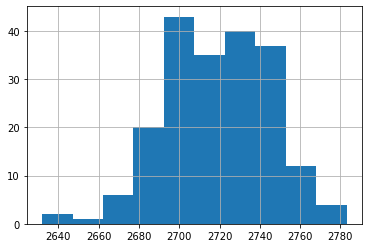

In [18]:
frame['c_cost'].hist()

<AxesSubplot:>

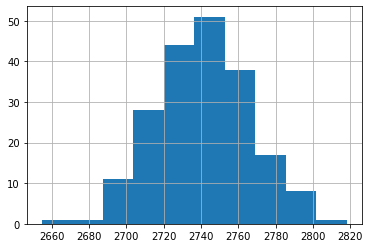

In [19]:
frame['b_cost'].hist()

<AxesSubplot:>

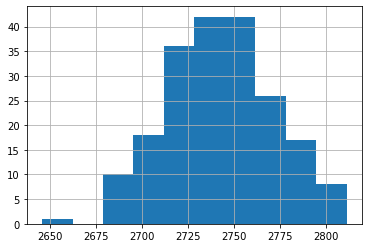

In [20]:
frame['a_cost'].hist()

<AxesSubplot:>

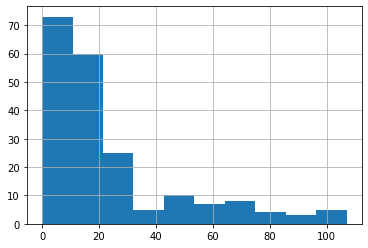

In [21]:
frame['diff_from_a'].hist()

<AxesSubplot:>

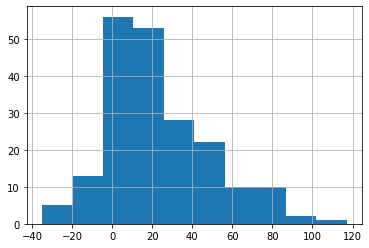

In [22]:
frame['diff_from_b'].hist()